In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
df_train = pd.read_csv(r"C:\Desktop\Datasets\archive\claim_train_data.csv")

In [113]:
df_train.head()

,Unnamed: 0,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,engine_type,...,steering_type_Manual,steering_type_Power,transmission_type_Automatic,transmission_type_Manual,rear_brakes_type_Disc,rear_brakes_type_Drum,torque,torque_rpm,power,power_rpm
0,0,0.515874,0.05,0.644231,1,4990,1,0,1,6,...,False,True,False,True,False,True,60.0,3500.0,40.36,6000.0
1,1,0.672619,0.02,0.375000,2,27003,1,0,1,6,...,False,True,False,True,False,True,60.0,3500.0,40.36,6000.0
2,2,0.841110,0.02,0.384615,3,4076,1,0,1,6,...,False,True,False,True,False,True,60.0,3500.0,40.36,6000.0
3,3,0.900277,0.11,0.432692,4,21622,1,3,2,2,...,False,False,True,False,False,True,113.0,4400.0,88.50,6000.0
4,4,0.596403,0.11,0.634615,5,34738,2,0,3,0,...,False,False,True,False,False,True,91.0,4250.0,67.06,5500.0


In [115]:
df_train.drop(columns='Unnamed: 0', inplace=True)

In [389]:
df_test = pd.read_csv(r"C:\Desktop\Datasets\archive\claim_test_data.csv")

In [399]:
df_test_ids = pd.read_csv(r"C:\Desktop\Datasets\archive\TASK3-TEST.csv")
policy_ids = df_test_ids['policy_id']

In [391]:
df_test.head()

,Unnamed: 0,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,engine_type,...,steering_type_Manual,steering_type_Power,transmission_type_Automatic,transmission_type_Manual,rear_brakes_type_Disc,rear_brakes_type_Drum,torque,torque_rpm,power,power_rpm
0,0,0.341732,0.00,0.586538,3,4076,1,0,1,6,...,False,True,False,True,False,True,60.0,3500.0,40.36,6000.0
1,1,0.307241,0.13,0.442308,8,8794,1,2,6,8,...,False,False,False,True,False,True,113.0,4400.0,88.50,6000.0
2,2,0.327924,0.12,0.451923,8,8794,2,0,3,0,...,False,False,True,False,False,True,91.0,4250.0,67.06,5500.0
3,3,0.782654,0.01,0.461538,5,34738,1,0,1,6,...,False,True,False,True,False,True,60.0,3500.0,40.36,6000.0
4,4,1.233404,0.02,0.634615,5,34738,1,0,1,6,...,False,True,False,True,False,True,60.0,3500.0,40.36,6000.0


In [393]:
df_test.drop(columns='Unnamed: 0', inplace=True)

In [123]:
df_train['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

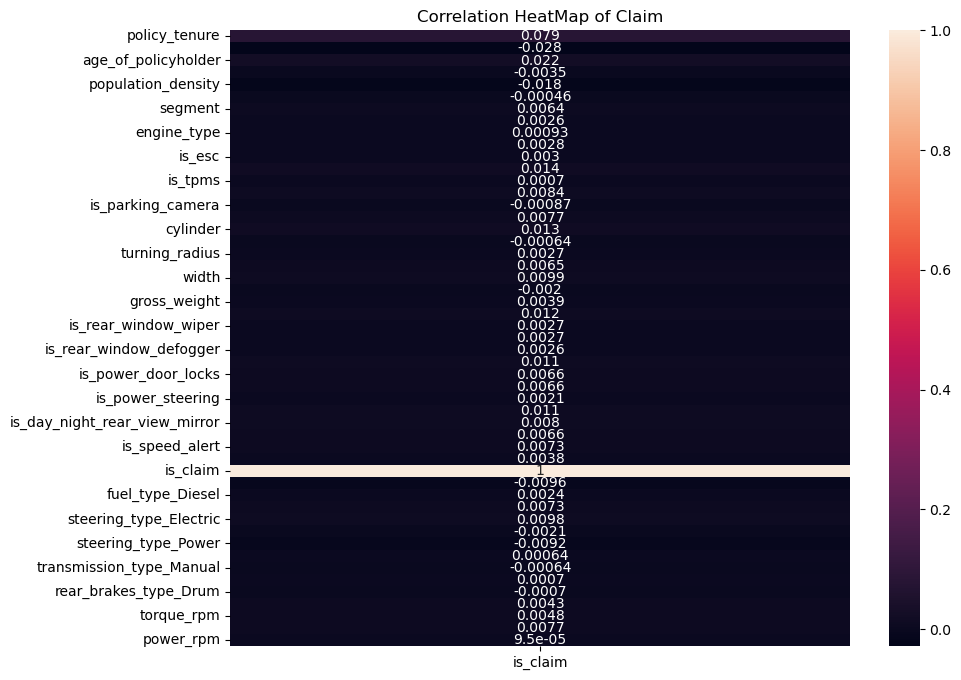

In [125]:
corr_matrix = df_train.corr()
claim_corr = corr_matrix[['is_claim']]
plt.figure(figsize=(10,8))
sns.heatmap(claim_corr, annot=True).set(title="Correlation HeatMap of Claim")
plt.show()

In [135]:
feature_columns = df_train.columns[df_train.columns != 'is_claim']
target_column = 'is_claim'

In [157]:
X = df_train[feature_columns]
y = df_train[target_column]

In [139]:
from sklearn.preprocessing import StandardScaler

In [159]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [161]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [369]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [371]:
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [335]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.7,test_size=0.3, random_state=42)

In [337]:
from sklearn.ensemble import RandomForestClassifier

In [339]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [341]:
y_pred = clf.predict(X_test_resampled)

In [343]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9223569453307807


In [345]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_resampled, y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[15338  1253]
 [ 1302 15014]]


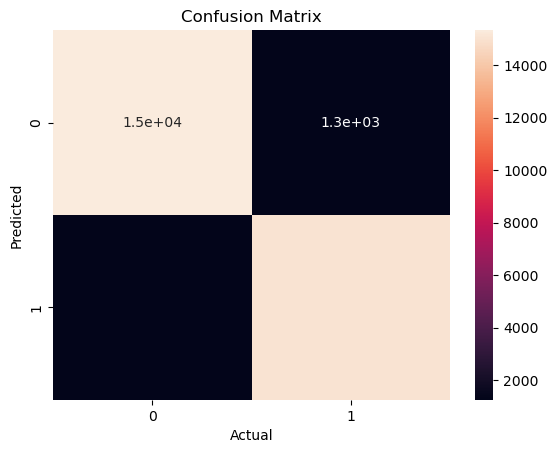

In [347]:
sns.heatmap(cm, annot=True).set(title='Confusion Matrix', xlabel='Actual', ylabel='Predicted')
plt.show()

In [349]:
from sklearn.metrics import classification_report

report = classification_report(y_test_resampled, y_pred)
print("Classfication Report")
print(report)

Classfication Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     16591
           1       0.92      0.92      0.92     16316

    accuracy                           0.92     32907
   macro avg       0.92      0.92      0.92     32907
weighted avg       0.92      0.92      0.92     32907



In [351]:
from sklearn.linear_model import LogisticRegression

In [373]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [375]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy Score: 0.9339515303219934
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     16417
           1       0.00      0.00      0.00      1161

    accuracy                           0.93     17578
   macro avg       0.47      0.50      0.48     17578
weighted avg       0.87      0.93      0.90     17578

Confusion Matrix:
[[16417     0]
 [ 1161     0]]


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


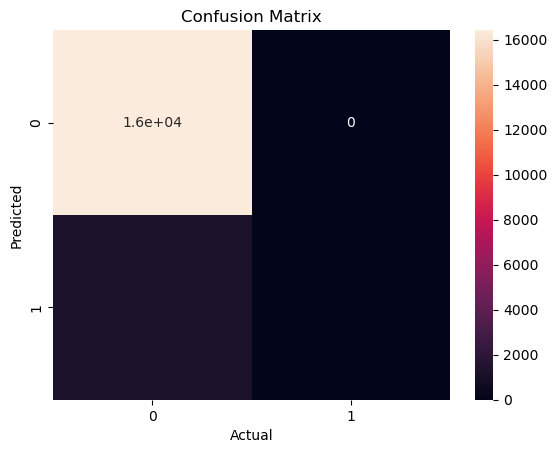

In [377]:
sns.heatmap(cm, annot=True).set(title='Confusion Matrix', xlabel='Actual', ylabel='Predicted')
plt.show()

In [359]:
from xgboost import XGBClassifier

In [361]:
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)
xgb_clf.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [363]:
y_pred = xgb_clf.predict(X_test_resampled)

accuracy = accuracy_score(y_test_resampled, y_pred)
report = classification_report(y_test_resampled, y_pred)

print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test_resampled, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy Score: 0.9276141854316711
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     16591
           1       0.97      0.88      0.92     16316

    accuracy                           0.93     32907
   macro avg       0.93      0.93      0.93     32907
weighted avg       0.93      0.93      0.93     32907

Confusion Matrix:
[[16223   368]
 [ 2014 14302]]


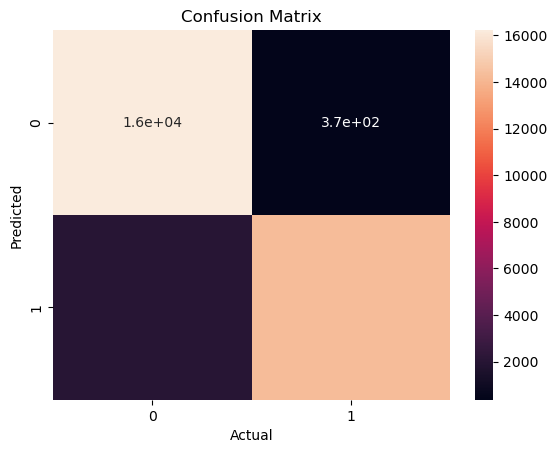

In [365]:
sns.heatmap(cm, annot=True).set(title='Confusion Matrix', xlabel='Actual', ylabel='Predicted')
plt.show()

In [383]:
xgb_clf_final = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100)
xgb_clf_final.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [403]:
# output of test data
predictions = xgb_clf_final.predict(df_test)
predictions_df = pd.DataFrame({'policy_id': policy_ids, 'predictions': predictions})
predictions_df.to_csv(r'C:\Desktop\Datasets\archive\predictions_data.csv')

In [385]:
import joblib

model_path = 'xgb_model2.pkl'

joblib.dump(xgb_clf_final, model_path)

print(f"Model saved to: {model_path}")

Model saved to: xgb_model2.pkl
